# Data Analysis - Coursework 1 (35%)

***

## Short Style Data Analysis Questions
### Deadline Friday week 6, 2pm.

***

## Instructions

This coursework assesses learning outcomes from **Chapters 1 - 4** of the course.

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a pdf. **Don't forget to execute all of your cells before you export the notebook to pdf**. You can constantly resubmit your turnitin document until the deadline.
- The breakdown of the assessment criteria is provided in Learning Central under Assessment.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- Please also take note of the University’s policy on **plagiarism**, which is outlined in your student handbook.

***

## QUESTION 1

**[10 marks]**

Answer:

In [1]:
def p_(f): #probability of passing each module
  return 0.8*f

#####A) f = 1

In [2]:
f = 1 #they attend all modules
p = p_(f) #probability of passing each individual module

#####**i**) probability of passing all three modules

In [3]:
from scipy import special 
def mod_pass_prob(p,x,n):
  return special.comb(n,x) * p**(x) * (1-p)**(n-x) #n[CHOOSE]x * (p_success ^ n_successes) * (p_faliure ^ n_faliures)

n = 3 #number of modules
x = 3 #number of successes

p_3 = mod_pass_prob(p,x,n) 

print(f"Probability of passing all 3 modules = {p_3:.4f}")

Probability of passing all 3 modules = 0.5120


#####**ii**) probability of passing two modules and failing one

In [4]:
x = 2 #number of successes
p_2 = mod_pass_prob(p,x,n) 

print(f"Probability of passing 2 modules = {p_2:.4f}")

Probability of passing 2 modules = 0.3840


#####**iii**) probability of passing only one module

In [5]:
x = 1 #number of successes
p_1 = mod_pass_prob(p,x,n) 

print(f"Probability of passing only 1 module = {p_1:.4f}")

Probability of passing only 1 module = 0.0960


#####**iv**) probability of passing no modules

In [6]:
x = 0 #number of successes
p_0 = mod_pass_prob(p,x,n)

print(f"Probability of passing no modules = {p_0:.4f}")

Probability of passing no modules = 0.0080


#####B) show these sum to 1

In [7]:
import numpy as np
total = p_3+p_2+p_1+p_0
i = (total == 1)
print(f"the sum of all the probabilities = {total}, so it is {i} that sum of p = 1")

the sum of all the probabilities = 1.0, so it is True that sum of p = 1


#####C) f = 0.5

In [8]:
f = 0.5 #they attend half all modules
p = p_(f) #probability of passing each individual module

x = np.array([3,2,1,0])

p_s = mod_pass_prob(p,x,n) #calculate all the probabilities at once using numpy

print(f"the probabilities for passing either 3, 2, 1, or no modules are {p_s} respectively")

the probabilities for passing either 3, 2, 1, or no modules are [0.064 0.288 0.432 0.216] respectively


#####D) for p_3 = 0.5, what is f

to 4.d.p. the value of f where p_3 = 0.5 is 0.9921


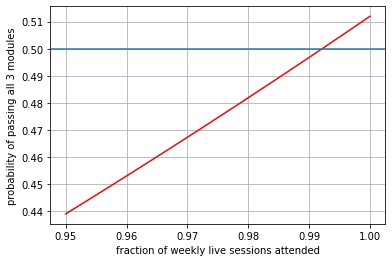

In [9]:
import matplotlib.pyplot as plt


f = np.linspace(0.95,1,100000)

p = p_(f)
n = 3
x = 3

p_s = mod_pass_prob(p,x,n)

plt.plot(f,p_s, "r-")
plt.axhline(0.5)

plt.xlabel("fraction of weekly live sessions attended")
plt.ylabel("probability of passing all 3 modules")
plt.grid()

f_50 = f[np.where(np.round(p_s, 6) == 0.5)]

print(f"to 4.d.p. the value of f where p_3 = 0.5 is {f_50[0]:.4f}")

#####F) 
This is an unrealistic way to model the probability that a student will pass the modules, because not everyone has equal access to attend the live lectures in person, for example someone who works hard but is disabled will ultimately miss more in person lectures that someone who never engages in the module, but their favourite class is in the same building only an hour before. If however, there are assessed quizes conducted in the live lecture which are worth credit for the module, this becomes a more viable model. 

##  QUESTION 2

Answer:

**[20 marks]**

In [36]:
p_D3_given_melanoma = 0.65

$H_0:$ is that the probability for M23 being present is no greater than the probability of D3 being present

$H_1:$ is that the probability of M23 being present is greater than D3

This means we can test the probability of 7/7 patients with the disease having M23 occurring randomly if the probability of them having M23 individually is = 0.65

In [46]:
r = np.array([7])
n = 7
p = p_D3_given_melanoma
print(f'The probability of 7/7 occuring with a probability of {p_D3_given_melanoma} is {sum(stats.binom.pmf(r, n, p)):.4%}')

The probability of 7/7 occuring with a probability of 0.65 is 4.9022%


As the probability is less than 5%, this means we can reject $H_0$ in favour of $H_1$, there is significant evidence that the new marker is better for the disease. 

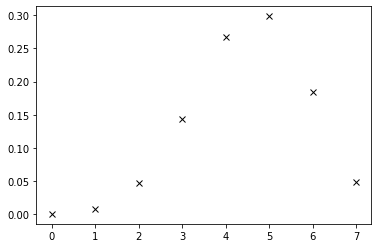

In [10]:
import numpy as np
import pylab as plt
# install packaged to do a normal function
from scipy.stats import binom
x = np.array([0,1,2,3,4,5,6,7])

plt.plot(x, binom.pmf(x, 7, 0.65), "kx")

***

## QUESTION 3 

**[15 marks]**

Answer:

***

## QUESTION 4 

**[25 marks]**

Answer:

***

## QUESTION 5

**[30 marks]**

Answer:

First lets plot the data

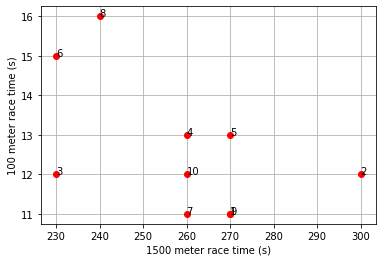

In [10]:
player_id = np.array([1,2,3,4,5,6,7,8,9,10])
m100 = np.array([ 11, 12, 12, 13, 13, 15, 11, 16, 11, 12]) #time in seconds to run the 100m race
m1500 = np.array([270, 300, 230, 260, 270, 230, 260, 240, 270, 260]) #time in seconds to run the 1500m race

plt.plot(m1500,m100, "or")
plt.ylabel("100 meter race time (s)")
plt.xlabel("1500 meter race time (s)")
plt.grid()
for i, _id in enumerate(player_id): #plot the player id at each point
    plt.annotate(_id, (m1500[i],m100[i]))

There is no obvious visible trend from this graph. Note there are only 9 points, but we can see that player 1 and 9 scored identical times in both tests

In [19]:
from scipy import stats

def spearman_diy(x,y):
  rank_x = stats.rankdata(x)
  rank_y = stats.rankdata(y)

  N = len(x)

  num = np.sum( (rank_x * rank_y) ) - ((N * (N+1)**2)/4)

  denom_x = ( np.sum(rank_x**2 )- (N * (N+1)**2)/4)
  denom_y = ( np.sum(rank_y**2 )- (N * (N+1)**2)/4)
  denom = denom_x**(1/2)*denom_y**(1/2)

  return num / denom

In [33]:
def pearsonr_homebrew(x,y):
  o_xy = np.sum((x-np.mean(x))*(y-np.mean(y)))
  o_x = np.sum((x-np.mean(x))**2)
  o_y = np.sum((y-np.mean(y))**2)

  return o_xy/np.sqrt(o_x * o_y)


In [34]:
corr = pearsonr_homebrew(m1500, m100)
print(f"Pearsons correlation = {corr:.4f}")

corr = spearman_diy(m1500, m100)
print(f'spearman correlation is: {corr:.3f}')

Pearsons correlation = -0.5295
spearman correlation is: -0.474


As the question is asking if the two are significantly correllated, we can set our null hypothesis 

$H_0$: there is no association between the times run in 1500m and 100m races. 

This makes our alternative hypothesis

$H_1$: there is significant monotomic association between the times run in 1500m and 100m races. 

Text(0.5, 0, 'time / mean time')

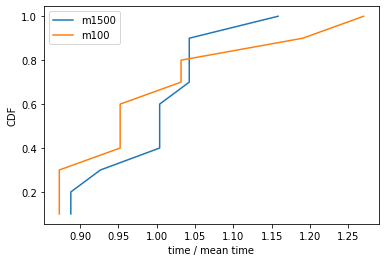

In [31]:
#make a function to plot the cumulative distribution function for the sample
def cdf(x):
    xs = np.sort(x)
    # this basically makes a cumulative distribution function
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

p_t,p_cdf = cdf(m1500/m1500.mean()) #adjust for the average of each
t_t,t_cdf = cdf(m100/m100.mean())

plt.plot(p_t,p_cdf,label='m1500')
plt.plot(t_t,t_cdf,label='m100')


plt.legend()
plt.ylabel('CDF')
plt.xlabel('time / mean time')